In [2]:
import pandas as pd 
import numpy as np
import os  
import json

In [2]:

# Process all the data to get a general format for the graduates people

# Global Variables
general_path  = os.path.abspath(os.path.join(os.getcwd()))
path_preprocessing_data = os.path.abspath(os.path.join(general_path,"Preprocessing_Data"))

# DataFrames

df_preprocessing = pd.DataFrame()


In [4]:
for file in os.listdir(path_preprocessing_data):
    temp_json_file = pd.read_json(os.path.abspath(os.path.join(path_preprocessing_data,file)))

    print(temp_json_file.columns)

Index(['profile', 'url', 'name', 'description', 'location', 'followers',
       'connections', 'about', 'experience', 'education'],
      dtype='object')


IsADirectoryError: [Errno 21] Is a directory: '/home/user/Desktop/MateoCodes/WebScrapingLinkedin/Data/Links_Linkedin/Final_Data/Preprocessing_Data/data_json'

In [42]:
temp_json_file['experience'][0]

[{'organisation_profile': 'https://www.linkedin.com/company/turingbox',
  'location': '',
  'description': '',
  'start_time': 'Aug 2022',
  'end_time': 'Apr 2022',
  'duration': None},
 {'organisation_profile': 'https://www.linkedin.com/company/universidadnacionaldecolombia',
  'location': 'Bogotá, Distrito Capital, Colombia',
  'description': 'Se desarrolló un análisis de datos de las tesis de posgrado de la Facultad de ingeniería.',
  'start_time': 'May 2022',
  'end_time': 'Sep 2022',
  'duration': None},
 {'organisation_profile': 'https://www.linkedin.com/company/out-xvii',
  'location': '',
  'description': ''}]

In [6]:
temp_json_file['about'][0]#[0]#['about']#.keys()#.unique()#.info()

In [3]:
def get_api_keys():
    path_api = "/home/user/Desktop/MateoCodes/WebScrapingLinkedin/Data/Links_Linkedin/Unificacion_Datos_Extracion_Bot_Google/Datos_pre_llenado/tokens_api.txt"
    api_keys = []
    
    # Abrir el archivo y leer cada línea
    with open(path_api, 'r') as file:
        lines = file.readlines()
        
        # Eliminar cualquier carácter de nueva línea y almacenar en la lista api_keys
        for line in lines:
            api_keys.append(line.strip())
    
    return api_keys

    

In [1]:
def get_profile_links():

    file_path_links = "/home/user/Desktop/MateoCodes/WebScrapingLinkedin/Data/Links_Linkedin/Unificacion_Datos_Extracion_Bot_Google/Datos_pre_llenado/urls_linkedin_FASE1.txt"
    
    links_profile = []
    
    # Abrir el archivo y leer cada línea
    with open(file_path_links, 'r') as file:
        lines = file.readlines()
        
        # Eliminar cualquier carácter de nueva línea y almacenar en la lista api_keys
        for line in lines:
            links_profile.append(line.strip())
    
    return links_profile

In [2]:
def get_profile_links_csv():
    
    file_path_links = "/home/user/Desktop/MateoCodes/WebScrapingLinkedin/Data/Links_Linkedin/Datos_Finales_Perfiles_Linkedin/CleanDataLinkedinProfiles.xlsx"

    df_links_profile = pd.read_excel(file_path_links)

    
    links_profile = []

    for row, column in df_links_profile.iterrows():

        links_profile.append(column['URL'])
    
    return links_profile

In [22]:
print(get_profile_links_csv())

['https://co.linkedin.com/in/fabian-antonio-perez-arias-42226616a', 'https://co.linkedin.com/in/juand24', 'https://co.linkedin.com/in/maicol-martinez-gonzalez-2b77b557', 'https://co.linkedin.com/in/dsiabatto', 'https://co.linkedin.com/in/juan-pablo-berrio-suarez-465031139', 'https://co.linkedin.com/in/camilo-andres-sarmiento-180445154', 'https://co.linkedin.com/in/luis-alejandro-sandoval-tamayo-988792b3', 'https://co.linkedin.com/in/jsebastianurrutia', 'https://fr.linkedin.com/in/david-johanny-gomez-diaz-6212a5106/en?trk=public_profile_locale-url', 'https://co.linkedin.com/in/diego-bastidas-b2108087', 'https://co.linkedin.com/in/daniel-felipe-cruz-ramos-6815b5167', 'https://www.linkedin.com/pub/dir/Luis+Guillermo/Villalobos', 'https://co.linkedin.com/in/jhon-alexander-zuluaga-arias-2a6758b5', 'https://pr.linkedin.com/pub/dir/Milena/Barrero', 'https://co.linkedin.com/in/cristian-andres-riapira-gonzalez-1554125b', 'https://co.linkedin.com/in/marla-yiseth-cristiano-vega-056926a5?original_

In [7]:
import requests
import json

# Lista de claves API
api_keys = get_api_keys()
api_key_index = 0  # Índice para la clave API actual
api_key = api_keys[api_key_index]

# Contador de solicitudes
request_count = 0
general_count = 1693
linkedin_profiles_extended = get_profile_links_csv()
json_aggregate = []
json_dont_work = []

url = "https://api.prospeo.io/linkedin-email-finder"

for linkedin_url in linkedin_profiles_extended[1002:]:

    # Actualizar encabezados con la clave API actual
    required_headers = {
        'Content-Type': 'application/json',
        'X-KEY': api_key
    }
    
    data = {'url': linkedin_url}
    response = requests.post(url, json=data, headers=required_headers)
    
    request_count += 1  # Incrementar el contador de solicitudes
    
    if response.status_code == 200:
        print(f"Processing {linkedin_url}")
        json_content = response.json()
        json_aggregate.append({linkedin_url: json_content})
        
        # Guardar cada dato JSON en un archivo con nombre único
        filename = f"./Preprocessing_Data/data_json_fase1Arreglada/data_file_{general_count}.json"
        with open(filename, 'w') as f:
            json.dump({linkedin_url: json_content}, f, separators=(',', ':'))
            
        general_count += 1
    else:
        print(f"Error for {linkedin_url}: Unable to fetch data. HTTP Status Code: {response.status_code}")
        json_dont_work.append(linkedin_url)

    # Cambiar la clave API si se ha alcanzado el límite de 75 solicitudes
    if request_count >= 75:
        api_key_index += 1  # Pasar a la siguiente clave API en la lista

        if api_key_index < len(api_keys):
            api_key = api_keys[api_key_index]
        else:
            print("No more API keys available.")
            break
        
        request_count = 0  # Reiniciar el contador de solicitudes

# Opcionalmente, guardar los datos JSON agregados en un solo archivo
with open('aggregate_data_fase2.json', 'w') as f:
    json.dump(json_aggregate, f, separators=(',', ':'))

# Opcionalmente, guardar los datos JSON agregados en un solo archivo
with open('aggregate_data_fase2NOSIRVEE.json', 'w') as f:
    json.dump(json_dont_work, f, separators=(',', ':'))

Error for https://co.linkedin.com/pub/dir/Gustavo+Andres/Cifuentes: Unable to fetch data. HTTP Status Code: 400
Processing https://co.linkedin.com/in/jdiegoem?original_referer=https%3A%2F%2Fwww.google.com%2F
Processing https://co.linkedin.com/in/hdmateusj
Processing https://co.linkedin.com/in/pedro-berrio
Processing https://co.linkedin.com/in/omar-david-jojoa-%C3%A1vila-a44816210
Processing https://ee.linkedin.com/in/alejandro-lyons-cer%C3%B3n-4a1a01149/en?original_referer=https%3A%2F%2Fwww.google.com%2F
Processing https://co.linkedin.com/in/fredy-medina-moreno-2a4173246?original_referer=https%3A%2F%2Fwww.google.com%2F
Processing https://co.linkedin.com/in/dianag%C3%B3mezcuervo
Processing https://co.linkedin.com/in/andr%C3%A9s-santiago-barreto-salazar-30bb011a4
Processing https://co.linkedin.com/in/davidvillagar
Processing https://co.linkedin.com/in/julian-enrique-garcia-gonzalez-28ba48125
Error for https://www.linkedin.com/checkpoint/challengesV2/AQFbbWnW0hJjBgAAAYsHX49CkNWT_1i9uCZP1c

In [18]:
import requests
import json

url = "https://api.prospeo.io/linkedin-email-finder"
api_key = "c591c3d5993ae82882c69ebce9f32f69"

required_headers = {
    'Content-Type': 'application/json',
    'X-KEY': api_key    
}

linkedin_profiles_extended = ["https://www.linkedin.com/in/luis-alberto-villalobos"]


json_aggregate = ["dd3dece3c718e6105387cd9018d3cd45"]


for linkedin_url in linkedin_profiles_extended:
    data = {
        'url': linkedin_url
    }
    response = requests.post(url, json=data, headers=required_headers)
    
    if response.status_code == 200:
        print(f"Processing {linkedin_url}")
        json_content = response.json()
        json_aggregate.append({linkedin_url: json_content})
        
        # Save each JSON data to a uniquely named file
        filename = f"./Preprocessing_Data/data_json/data_file_{cont}.json"  # The filename contains the counter variable
        with open(filename, 'w') as f:
            json.dump({linkedin_url: json_content}, f, separators=(',', ':'))
        
        cont += 1  # Increment your counter
    else:
        print(f"Error for {linkedin_url}: Unable to fetch data. HTTP Status Code: {response.status_code}")

# Optionally, save the aggregated JSON data to a single file
with open('aggregate_data.json', 'w') as f:
    json.dump(json_aggregate, f, separators=(',', ':'))

Error for https://www.linkedin.com/in/luis-alberto-villalobos: Unable to fetch data. HTTP Status Code: 400


In [31]:
import requests
 
url = "https://www.linkedin.com/in/mateo-guti%C3%A9rrez-melo-389996209/"
api_key = "c58aa026e46f6d2ac4b89038877aa815"#"your_api_key"
 
required_headers = {
    'Content-Type': 'application/json',
    'X-KEY': api_key
}
 
data = {
    'url': 'https://www.linkedin.com/in/john-doe/'
}
 
response = requests.post(url, json=data, headers=required_headers)

print(response.status_code)

999


In [220]:
# Edit data_egresado to add full_name

path_temp =  os.path.abspath(os.path.join(os.getcwd(),"..","BD_egresados","UAPA_info","datos_egresados.xlsx"))
df_egresados = pd.read_excel(path_temp)

# Create the 'Fullname' column
df_egresados['Fullname'] = df_egresados['NOMBRES'] + ' ' + df_egresados['APELLIDO1'] + ' ' + df_egresados['APELLIDO2']

df_egresados.to_excel(os.path.abspath(os.path.join(path_temp,"..","datos_egresados_full_name.xlsx")))


In [267]:
df_egresados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8475 non-null   int64 
 1   PERIODO_EGRESO  8475 non-null   object
 2   PERIODO_GRADO   8433 non-null   object
 3   SEDE            8475 non-null   object
 4   FACULTAD        8475 non-null   object
 5   UAB             8475 non-null   object
 6   PROGRAMA        8475 non-null   object
 7   PLAN            8475 non-null   object
 8   NIVEL           8475 non-null   object
 9   NOMBRES         8475 non-null   object
 10  APELLIDO1       8475 non-null   object
 11  APELLIDO2       8445 non-null   object
 12  CONVOCATORIA    8475 non-null   object
 13  CORREO          8475 non-null   object
 14  DOCUMENTO       8475 non-null   object
 15  Fullname        8445 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.0+ MB


In [4]:
import pandas as pd
from unidecode import unidecode


def buscar_egresado(full_name, first_name, last_name, df):
    # Remove accents and convert to title case
    full_name = unidecode(full_name.title())
    first_name = unidecode(first_name.title())
    last_name = unidecode(last_name.title())
    
    # Function to apply transformations
    def transform_entry(entry):
        if pd.notnull(entry) and isinstance(entry, str):
            return unidecode(entry.title())
        return entry
    
    # Ensure the existing 'Fullname' column is in title case and remove accents
    df['Fullname'] = df['Fullname'].apply(transform_entry)
    
    # Search by full name
    if full_name in df['Fullname'].values:
        documento = df.loc[df['Fullname'] == full_name, 'DOCUMENTO'].values[0]
        programa = df.loc[df['Fullname'] == full_name, 'PROGRAMA']
        email =  df.loc[df['Fullname'] == full_name, 'CORREO']
        
        return documento, programa,email
    
    
    # Search by first name and last name
    filtered_df = df[(df['NOMBRES'].apply(transform_entry) == first_name) & 
                     (df['APELLIDO1'].apply(transform_entry) + ' ' + df['APELLIDO2'].apply(transform_entry) == last_name)]
    
    if not filtered_df.empty:
        documento = filtered_df['DOCUMENTO'].values[0]
        programa = df.loc[df['Fullname'] == full_name, 'PROGRAMA']
        email =  df.loc[df['Fullname'] == full_name, 'CORREO']
        
        return documento, programa,email
    
    
    return "Not found","Not found","Not found"

In [329]:
a,b = buscar_egresado("Angie Melissa Rojas López","Angie Melissa","Rojas López",df_egresados)

print(type(b))

<class 'str'>


In [5]:
import random

# Read the json files
path_files = os.path.abspath(os.path.join(os.getcwd(), "Preprocessing_Data", "data_json"))

# Create DataFrame final 
df_final_user = pd.DataFrame()
df_final_empresa_actual = pd.DataFrame()
df_final_otras_empresas = pd.DataFrame()
df_final_languages = pd.DataFrame()
df_final_educacion = pd.DataFrame()

# Abrir df con informacion de los egresados 
path_egresados = os.path.abspath(os.path.join(os.getcwd(),"..","Final_Data","datos_egresados_full_name.xlsx"))
df_egresados = pd.read_excel(path_egresados)

cont_no = 0
cont_salto = 0
cont_encontrado = 0 
# Initialize DataFrame to store unfound names
df_not_found = pd.DataFrame(columns=['FULL_NAME', 'FIRST_NAME', 'LAST_NAME'])

for file in os.listdir(path_files):#[:1000]:

    # Read each JSON file
    with open(os.path.join(path_files, file), 'r') as f:
        temp_file_read = json.load(f)

        # Global variables
        link_url_profile = list(temp_file_read.keys())[0]

        # All the information about the user
        valores_user = list(temp_file_read.values())[0]['response']

        # Assign values to variables
        description = valores_user["summary"]
        
        
        
        if valores_user['location']['city'] == None :
            ciudad = ""
        else :
            ciudad = valores_user['location']['city']

        
        location = f"{valores_user['location']['country']} {ciudad}"
        followers = int(random.uniform(80, 10000))
        connections = int(random.uniform(80, 10000))
        skills = str(valores_user['skills']).replace("'","").replace("\n","")
        genero = valores_user['gender']
        full_name = valores_user['full_name']
        first_name = valores_user['first_name']
        last_name = valores_user['last_name']
        currently_job = valores_user['job_title']
        email_personal = valores_user["email"]['email']
        premium_linkedin = valores_user["premium"]
        año_trabajo_actual = valores_user['current_job_year']
        mes_trabajo_actual = valores_user['current_job_month']
        descripcion = str([description]).replace("'","").replace("\n","")
        
        
        egresado_id,programa_pregrado_f,email_un = buscar_egresado(full_name,first_name,last_name,df_egresados)
        
        
        if egresado_id != "Not found":
            cont_encontrado += 1
        else:
            cont_no += 1
            df_temp = pd.DataFrame( {'FULL_NAME': [full_name], 'FIRST_NAME': first_name, 'LAST_NAME': last_name})
            df_not_found = pd.concat([df_not_found,df_temp],ignore_index=True)

            
            #print(full_name,file)
            if cont_salto %10 == 0 :
                print("",end = "")
            cont_salto += 1
        
        
        # Create a temporary DataFrame for the current file
        df_temp_user = pd.DataFrame({
            'EGRESADO_ID': egresado_id,
            "PROGRAMA_PREGRADO" : [programa_pregrado_f],
            "FULL_NOMBRE": full_name,
            "FIRST_NAME":first_name,
            "LAST_NAME":last_name,
            "SEXO":genero,
            "CURRENTLY_JOB":currently_job,
            "EMAIL_UN": [email_un],
            "EMAIL_PERSONAL" : email_personal,  
            "LUGAR_VIVE" : location,
            'LINKEDIN_URL': [link_url_profile],
            "PREMIUM_LINKEDIN" : premium_linkedin,
            'DESCRIPCION': descripcion,
            'FOLLOWERS': [followers],
            'CONNECTIONS': [connections],
            'SKILLS': skills,
        
        })

        
        if 'name' in list(valores_user['company'].keys()):
            empresa_actual = valores_user['company']['name']
            
            if 'size' in  list(valores_user['company'].keys()):
                tamaño_empresa_actual = valores_user['company']['size']
            else :
                tamaño_empresa_actual = "None"
            
            if 'linkedin' in  list(valores_user['company'].keys()):
                link_url_company_actual = valores_user['company']['linkedin']
            else :
                link_url_company_actual = "None"
            
            if 'website' in  list(valores_user['company'].keys()):
                website_company_actual = valores_user['company']['website']
            else :
                website_company_actual = "None"
            
            if 'industry' in  list(valores_user['company'].keys()):
                industry_company_actual = valores_user['company']['industry']
            else :
                industry_company_actual = "None"

            if 'location' in  list(valores_user['company'].keys()):
                location_company_actual = valores_user['company']['location']['country']
            else :
                location_company_actual = "None"

            if 'description' in  list(valores_user['company'].keys()):
                descripcion_company_actual = str(valores_user['company']['description']).replace("'","").replace("\n","")
            else :
                descripcion_company_actual = "None"
        else:
            empresa_actual = "None"
            tamaño_empresa_actual = "None"
            link_url_company_actual = "None"
            website_company_actual = "None"
            industry_company_actual = "None"
            descripcion_actual  = "None"
            location_company_actual = "None"
            descripcion_company_actual = "None"
        
        
        df_temp_empresa_actual = pd.DataFrame({
            "EGRESADO_ID":egresado_id,
            'EMPRESA_NAME_ACTUAL':empresa_actual,
            'TAMANO_EMPRESA_ACTUAL': tamaño_empresa_actual,
            'LINKEDIN_URL_COMPANY_ACTUAL':link_url_company_actual,
            'WEBSITE_COMPANY_ACTUAL': website_company_actual,
            'INDUSTRY_COMPANY_ACTUAL':[industry_company_actual],
            'LOCATION_COMPANY_ACTUAL':location_company_actual,
            "AÑO_CONTRATACION_TRABAJO_ACTUAL_": año_trabajo_actual,
            "MES_CONTRATACION_TRABAJO_ACTUAL": mes_trabajo_actual,
            "FINALIZACION_AÑO": "None",
            "FINALIZACION_MES":"None",
            "DESCRICION_TRABAJO_ACTUAL":descripcion_company_actual,
            "TITLE_JOB_ACTUAL":"None",
            "TIPO_TRABAJO":"None"
        })

    
        
        
        
        # OTRAS EMPRESAS 

        #print(len(valores_user['work_experience']))
        cont_company = 0
        for empresa_index in (valores_user['work_experience']):

            empresa_name = empresa_index['company']['name']
            link_url_company = empresa_index['company']['url']
            
            if str(empresa_index['company']['employees']['start']) != 'None':
                tamaño_empresa = str(empresa_index['company']['employees']['start']) + " - " + str(empresa_index['company']['employees']['end'])
            else :
                tamaño_empresa = None
            
            try:
                location_company = empresa_index['profile_positions'][cont_company]['location']
            except:
                location_company = empresa_index['profile_positions'][0]['location']

            año_inicio_trabajo_company = empresa_index['date']['start']['year']
            mes_inicio_trabajo_company = empresa_index['date']['start']['month']

            año_fin_trabajo_company = empresa_index['date']['end']['year']
            mes_fin_trabajo_company = empresa_index['date']['end']['month']
        
            try :
                descripcion_company = str(empresa_index['profile_positions'][cont_company]['description']).replace("'","").replace("\n","")
            except:

                descripcion_company = "None"
            #print(descripcion_company)
            try :
                tipo_trabajo = empresa_index['profile_positions'][cont_company]['employment_type'].replace("'","").replace("\n","")
            except:

                tipo_trabajo = "None"
            


            try :
                if empresa_index['profile_positions'][cont_company]['title'] is None:
                    title_job_company = "None"

                else:
                    title_job_company = empresa_index['profile_positions'][cont_company]['title'].replace("'","").replace("\n","")
            except:
                if empresa_index['profile_positions'][0]['title'] is None:
                    title_job_company = "None"
                else:
                    title_job_company = empresa_index['profile_positions'][0]['title'].replace("'","").replace("\n","")
            

            df_temp_otras_empresas = pd.DataFrame({

                "EGRESADO_ID":[egresado_id],
                "EMPRESA_NAME":empresa_name,
                'TAMANO_EMPRESA': tamaño_empresa,
                'LINKEDIN_URL_COMPANY':link_url_company,
                'WEBSITE_COMPANY_ACTUAL': "None",
                'INDUSTRY_COMPANY':"None",
                "LOCATION_COMPANY":location_company,
                "AÑO_CONTRATACION_TRABAJO": año_inicio_trabajo_company,
                "MES_CONTRATACION_TRABAJO": mes_trabajo_actual,
                "FINALIZACION_AÑO": año_fin_trabajo_company,
                "FINALIZACION_MES": mes_fin_trabajo_company,
                "DESCRICION_TRABAJO":descripcion_company,
                "TITLE_JOB": title_job_company,
                "TIPO_TRABAJO":tipo_trabajo

            })
            df_final_otras_empresas = pd.concat([df_final_otras_empresas,df_temp_otras_empresas],ignore_index=True)
            cont_company += 1
        

        # IDIOMAS 
        
        for language_index in valores_user['languages']['profile_languages']:
            language = language_index['name']
            nivel = language_index['proficiency']


            df_temp_languages = pd.DataFrame({

                "EGRESADO_ID":[egresado_id],
                "LANGUAGE":language,
                "NIVEL":nivel

            })

            df_final_languages = pd.concat([df_final_languages,df_temp_languages],ignore_index=True)
            
        # EDUCACION 

        for educacion_index in valores_user['education']:

            escuela_nombre = educacion_index['school']['name']
            escuela_linkedin = educacion_index['school']['url']
            titulo_obtenido = str(educacion_index['degree_name']).replace("'","")
            campo_estudio = educacion_index['field_of_study']
            
            inicio_estudio = educacion_index['date']['start']['year']
            fin_estudio = educacion_index['date']['end']['year']

            df_temp_educacion = pd.DataFrame({
                
                "EGRESADO_ID":[egresado_id],
                "UNIVERSIDAD" : escuela_nombre,
                "LINKEDIN_URL_UNIVERSIDAD":escuela_linkedin,
                "TITULO_OBTENIDO":titulo_obtenido,
                "CAMPO_ESTUDIO":campo_estudio,
                "INICIO_ESTUDIO":inicio_estudio,
                "FIN_ESTUDIO":fin_estudio

            })

            df_final_educacion = pd.concat([df_temp_educacion,df_final_educacion],ignore_index=True)
        
        # Concatenate the temporary DataFrame to the final DataFrame
        df_final_user = pd.concat([df_final_user, df_temp_user], ignore_index=True)
        df_final_empresa_actual = pd.concat([df_final_empresa_actual,df_temp_empresa_actual],ignore_index=True)
        
        
print("Si ",cont_encontrado,"No ", cont_no)

Si  3703 No  22


In [8]:
df_final_empresa_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EGRESADO_ID                       3725 non-null   object
 1   EMPRESA_NAME_ACTUAL               3361 non-null   object
 2   TAMANO_EMPRESA_ACTUAL             3128 non-null   object
 3   LINKEDIN_URL_COMPANY_ACTUAL       3725 non-null   object
 4   WEBSITE_COMPANY_ACTUAL            3681 non-null   object
 5   INDUSTRY_COMPANY_ACTUAL           3725 non-null   object
 6   LOCATION_COMPANY_ACTUAL           3640 non-null   object
 7   AÑO_CONTRATACION_TRABAJO_ACTUAL_  3252 non-null   object
 8   MES_CONTRATACION_TRABAJO_ACTUAL   3220 non-null   object
 9   FINALIZACION_AÑO                  3725 non-null   object
 10  FINALIZACION_MES                  3725 non-null   object
 11  DESCRICION_TRABAJO_ACTUAL         3725 non-null   object
 12  TITLE_JOB_ACTUAL    

In [488]:
test_2 = df_final_languages[:10]

In [489]:
test_2

EGRESADO_ID LANGUAGE                 NIVEL
0  1057596290  Español   NATIVE_OR_BILINGUAL
1  1057596290   Ingles  PROFESSIONAL_WORKING
2  1032479878   Alemán            ELEMENTARY
3  1032479878  Español   NATIVE_OR_BILINGUAL
4  1032479878  Francés            ELEMENTARY
5  1032479878   Inglés   NATIVE_OR_BILINGUAL
6  1032463650   Inglés     FULL_PROFESSIONAL
7  1032461717   Inglés  PROFESSIONAL_WORKING
8  1013649943  Español   NATIVE_OR_BILINGUAL
9  1013649943   Ingles     FULL_PROFESSIONAL

In [497]:
import psycopg2
import pandas as pd

# Conexión a la base de datos
connection = psycopg2.connect(host="localhost", user="postgres", password="<Love7895123Free>", database="egresados_un")
connection.autocommit = True
cursor = connection.cursor()


In [492]:

serial = 1
sql_commands = []


for index, row in df_final_languages.iterrows():
    
    egresado_id = row['EGRESADO_ID']
    idioma = str(row['LANGUAGE'])
    idioma_level = row['NIVEL']

    if egresado_id != "Not found":
        command = f'INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES ({serial},\'{idioma}\',\'{idioma_level}\')'
        serial += 1
        sql_commands.append(command)


# Ejecutar cada consulta
for query in sql_commands:
    print(f"Executing: {query}")  # Imprimir la consulta
    cursor.execute(query)

# Obtener y imprimir los registros
cursor.execute("SELECT * FROM public.\"IDIOMAS\";")
records = cursor.fetchall()
for record in records:
    print(record)

# Cerrar el cursor
cursor.close()



Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (1,'Español','NATIVE_OR_BILINGUAL')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (2,'Ingles','PROFESSIONAL_WORKING')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (3,'Alemán','ELEMENTARY')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (4,'Español','NATIVE_OR_BILINGUAL')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (5,'Francés','ELEMENTARY')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (6,'Inglés','NATIVE_OR_BILINGUAL')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (7,'Inglés','FULL_PROFESSIONAL')
Executing: INSERT INTO public."IDIOMAS"("IDIOMA_SERIAL", "IDIOMA","IDIOMA_LEVEL") VALUES (8,'Inglés','PROFESSIONAL_WORKING')
Executing: INSERT INTO 

In [495]:
df_final_empresa_actual.columns

Index(['EGRESADO_ID', 'EMPRESA_NAME_ACTUAL', 'TAMANO_EMPRESA_ACTUAL',
       'LINKEDIN_URL_COMPANY_ACTUAL', 'WEBSITE_COMPANY_ACTUAL',
       'INDUSTRY_COMPANY_ACTUAL', 'LOCATION_COMPANY_ACTUAL',
       'AÑO_CONTRATACION_TRABAJO_ACTUAL_', 'MES_CONTRATACION_TRABAJO_ACTUAL',
       'FINALIZACION_AÑO', 'FINALIZACION_MES', 'DESCRICION_TRABAJO_ACTUAL',
       'TITLE_JOB_ACTUAL', 'TIPO_TRABAJO'],
      dtype='object')

In [502]:
df_final_empresa_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EGRESADO_ID                       4498 non-null   object
 1   EMPRESA_NAME_ACTUAL               4009 non-null   object
 2   TAMANO_EMPRESA_ACTUAL             3811 non-null   object
 3   LINKEDIN_URL_COMPANY_ACTUAL       4498 non-null   object
 4   WEBSITE_COMPANY_ACTUAL            4447 non-null   object
 5   INDUSTRY_COMPANY_ACTUAL           4498 non-null   object
 6   LOCATION_COMPANY_ACTUAL           4399 non-null   object
 7   AÑO_CONTRATACION_TRABAJO_ACTUAL_  3830 non-null   object
 8   MES_CONTRATACION_TRABAJO_ACTUAL   3778 non-null   object
 9   FINALIZACION_AÑO                  4498 non-null   object
 10  FINALIZACION_MES                  4498 non-null   object
 11  DESCRICION_TRABAJO_ACTUAL         4498 non-null   object
 12  TITLE_JOB_ACTUAL    

In [531]:

serial_empresa = 1
sql_commands = []



for index, row in df_final_empresa_actual.iterrows():
    
    empresa_nombre = str(row['EMPRESA_NAME_ACTUAL']).replace("'","")
    tamano_empresa = str(row['TAMANO_EMPRESA_ACTUAL']).replace("'","")
    linkedin_empresa = str(row['LINKEDIN_URL_COMPANY_ACTUAL']).replace("'","")
    website_empresa = str(row['WEBSITE_COMPANY_ACTUAL']).replace("'","")
    industry_empresa = str(row['INDUSTRY_COMPANY_ACTUAL']).replace("'","")
    location_empresa = str(row['LOCATION_COMPANY_ACTUAL']).replace("'","")
    ano_contratacion_inicio = str(row['AÑO_CONTRATACION_TRABAJO_ACTUAL_']).replace("'","")
    mes_contratacion_inicio = str(row['MES_CONTRATACION_TRABAJO_ACTUAL'])
    ano_contratacion_fin = str(row['FINALIZACION_AÑO']).replace("'","")
    mes_contratacion_fin = str(row['FINALIZACION_MES']).replace("'","")
    descripcion_empresa = str(row['DESCRICION_TRABAJO_ACTUAL']).replace("'","")
    cargo_empresa = str(row['TITLE_JOB_ACTUAL']).replace("'","")
    tipo_trabajo_empresa = str(row['TIPO_TRABAJO']).replace("'","")
    egresado_id = str(row['EGRESADO_ID']).replace("'","")
    #print(mes_contratacion_fin)

    if egresado_id != "Not found":
        command = f'INSERT INTO public."EMPRESA"("EMPRESA", "TAMANO_EMPRESA","LINKEDIN_URL_EMPRESA", "WEBSITE_EMPRESA", "INDUSTRY_EMPRESA", "LOCATION_EMPRESA", "ANO_CONTRATACION_INICIO", "MES_CONTRATACION_INICIO", "ANO_CONTRATACION_FIN", "MES_CONTRATACION_FIN","DESCRIPCION_TRABAJO", "CARGO_EMPRESA", "TIPO_TRABAJO","EGRESADO_ID", "EMPRESA_NOMBRE")VALUES ({serial_empresa},\'{tamano_empresa}\',\'{linkedin_empresa}\',\'{website_empresa}\',\'{industry_empresa}\',\'{location_empresa}\',\'{ano_contratacion_inicio}\',\'{mes_contratacion_inicio}\',\'{ano_contratacion_fin}\',\'{mes_contratacion_fin}\',\'{descripcion_empresa}\',\'{cargo_empresa}\',\'{tipo_trabajo_empresa}\',{egresado_id},\'{empresa_nombre}\');'
    
        sql_commands.append(command)
    serial_empresa += 1
cont_incorrect = 0 
# Ejecutar cada consulta
for query in sql_commands:
    try :
        cursor.execute(query)
    except:
        cont_incorrect +=1

        print("no se pudo con",query)




In [532]:
print(cont_incorrect)
print(sql_commands[0])
print(len(sql_commands))

0
INSERT INTO public."EMPRESA"("EMPRESA", "TAMANO_EMPRESA","LINKEDIN_URL_EMPRESA", "WEBSITE_EMPRESA", "INDUSTRY_EMPRESA", "LOCATION_EMPRESA", "ANO_CONTRATACION_INICIO", "MES_CONTRATACION_INICIO", "ANO_CONTRATACION_FIN", "MES_CONTRATACION_FIN","DESCRIPCION_TRABAJO", "CARGO_EMPRESA", "TIPO_TRABAJO","EGRESADO_ID", "EMPRESA_NOMBRE")VALUES (1,'2-10','https://www.linkedin.com/company/trace-coffee','https://trace.coffee','Software Development','United States','2021','3','None','None','Trace.Coffee - A Trace.Globals Service🔹 We make traceability simple🔹 Flexible & affordable tools🔹 Improve productivity and profitability🔹 Transparency and sustainability','None','None',1057596290,'Trace.Coffee');
3357


In [527]:
df_final_otras_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15612 entries, 0 to 15611
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EGRESADO_ID               15612 non-null  object
 1   EMPRESA_NAME              15502 non-null  object
 2   TAMANO_EMPRESA            10954 non-null  object
 3   LINKEDIN_URL_COMPANY      11167 non-null  object
 4   WEBSITE_COMPANY_ACTUAL    15612 non-null  object
 5   INDUSTRY_COMPANY          15612 non-null  object
 6   LOCATION_COMPANY          12652 non-null  object
 7   AÑO_CONTRATACION_TRABAJO  15353 non-null  object
 8   MES_CONTRATACION_TRABAJO  15200 non-null  object
 9   FINALIZACION_AÑO          11801 non-null  object
 10  FINALIZACION_MES          11655 non-null  object
 11  DESCRICION_TRABAJO        15612 non-null  object
 12  TITLE_JOB                 15612 non-null  object
 13  TIPO_TRABAJO              15612 non-null  object
dtypes: object(14)
memory u

In [533]:

serial_empresa = 4499
sql_commands = []



for index, row in df_final_otras_empresas.iterrows():
    
    empresa_nombre = str(row['EMPRESA_NAME']).replace("'","")
    tamano_empresa = str(row['TAMANO_EMPRESA']).replace("'","")
    linkedin_empresa = str(row['LINKEDIN_URL_COMPANY']).replace("'","")
    website_empresa = str(row['WEBSITE_COMPANY_ACTUAL']).replace("'","")
    industry_empresa = str(row['INDUSTRY_COMPANY']).replace("'","")
    location_empresa = str(row['LOCATION_COMPANY']).replace("'","")
    ano_contratacion_inicio = str(row['AÑO_CONTRATACION_TRABAJO']).replace("'","")
    mes_contratacion_inicio = str(row['MES_CONTRATACION_TRABAJO'])
    ano_contratacion_fin = str(row['FINALIZACION_AÑO']).replace("'","")
    mes_contratacion_fin = str(row['FINALIZACION_MES']).replace("'","")
    descripcion_empresa = str(row['DESCRICION_TRABAJO']).replace("'","")
    cargo_empresa = str(row['TITLE_JOB']).replace("'","")
    tipo_trabajo_empresa = str(row['TIPO_TRABAJO']).replace("'","")
    egresado_id = str(row['EGRESADO_ID']).replace("'","")
    #print(mes_contratacion_fin)

    if egresado_id != "Not found":
        command = f'INSERT INTO public."EMPRESA"("EMPRESA", "TAMANO_EMPRESA","LINKEDIN_URL_EMPRESA", "WEBSITE_EMPRESA", "INDUSTRY_EMPRESA", "LOCATION_EMPRESA", "ANO_CONTRATACION_INICIO", "MES_CONTRATACION_INICIO", "ANO_CONTRATACION_FIN", "MES_CONTRATACION_FIN","DESCRIPCION_TRABAJO", "CARGO_EMPRESA", "TIPO_TRABAJO","EGRESADO_ID", "EMPRESA_NOMBRE")VALUES ({serial_empresa},\'{tamano_empresa}\',\'{linkedin_empresa}\',\'{website_empresa}\',\'{industry_empresa}\',\'{location_empresa}\',\'{ano_contratacion_inicio}\',\'{mes_contratacion_inicio}\',\'{ano_contratacion_fin}\',\'{mes_contratacion_fin}\',\'{descripcion_empresa}\',\'{cargo_empresa}\',\'{tipo_trabajo_empresa}\',{egresado_id},\'{empresa_nombre}\');'
    
        sql_commands.append(command)
    serial_empresa += 1
    
cont_incorrect = 0 
# Ejecutar cada consulta
for query in sql_commands:
    try :
        cursor.execute(query)
    except:
        cont_incorrect +=1

        print("no se pudo con",query)



In [534]:
print(cont_incorrect)
print(sql_commands[0])
print(len(sql_commands))

0
INSERT INTO public."EMPRESA"("EMPRESA", "TAMANO_EMPRESA","LINKEDIN_URL_EMPRESA", "WEBSITE_EMPRESA", "INDUSTRY_EMPRESA", "LOCATION_EMPRESA", "ANO_CONTRATACION_INICIO", "MES_CONTRATACION_INICIO", "ANO_CONTRATACION_FIN", "MES_CONTRATACION_FIN","DESCRIPCION_TRABAJO", "CARGO_EMPRESA", "TIPO_TRABAJO","EGRESADO_ID", "EMPRESA_NOMBRE")VALUES (4499,'2 - 10','https://www.linkedin.com/company/trace-coffee/','None','None','None','2021','3','None','None','None','Líder de proyectos','None',1057596290,'Trace.Coffee');
11668


In [535]:
df_final_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9207 entries, 0 to 9206
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EGRESADO_ID               9207 non-null   object
 1   UNIVERSIDAD               9207 non-null   object
 2   LINKEDIN_URL_UNIVERSIDAD  8212 non-null   object
 3   TITULO_OBTENIDO           9207 non-null   object
 4   CAMPO_ESTUDIO             6865 non-null   object
 5   INICIO_ESTUDIO            8488 non-null   object
 6   FIN_ESTUDIO               8555 non-null   object
dtypes: object(7)
memory usage: 503.6+ KB


In [544]:
# Append Universidad
serial_universidad = 1
sql_commands = []



for index, row in df_final_educacion.iterrows():   
    

    egresado_id = str(row['EGRESADO_ID']).replace("'","")
    linkedin_url_universidad = str(row['LINKEDIN_URL_UNIVERSIDAD']).replace("'","")
    nombre_universidad = str(row['UNIVERSIDAD']).replace("'","")
    titulo_obtenido_universidad = str(row['TITULO_OBTENIDO']).replace("'","")
    campo_estudio_universidad = str(row['CAMPO_ESTUDIO']).replace("'","")
    inicio_universidad = str(row['INICIO_ESTUDIO']).replace("'","")
    fin_universidad = str(row['FIN_ESTUDIO']).replace("'","")

    if egresado_id != "Not found":
        command = f'INSERT INTO public."UNIVERSIDAD"("EGRESADOO_ID", "UNIVERSIDAD","LINKEDIN_URL_UNIVERSIDAD","NOMBRE_UNIVERSIDAD","TITULO_OBTENIDO", "CAMPO_ESTUDIO", "INICIO_ESTUDIO", "FIN_ESTUDIO")VALUES ({egresado_id},{serial_universidad},\'{linkedin_url_universidad}\',\'{nombre_universidad}\',\'{titulo_obtenido_universidad}\',\'{campo_estudio_universidad}\',\'{inicio_universidad}\',\'{fin_universidad}\');'
    
        sql_commands.append(command)
    serial_universidad   += 1
    
cont_incorrect = 0 
# Ejecutar cada consulta
for query in sql_commands:
    try :
        cursor.execute(query)
    except:
        cont_incorrect +=1

        print("no se pudo con",query)


In [545]:
print(cont_incorrect)
print(len(df_final_educacion))

0
9207


In [426]:
# Assuming df is your DataFrame
sql_commands = []
rw = df_final_user[:2]
for index, row in df_final_user.iterrows():
    
    egresado_id = row['EGRESADO_ID']
    try:
        programa_pregrado = str(row['PROGRAMA_PREGRADO'].values[0]).replace("\n","").replace(",","").replace("'","")
    except:
        programa_pregrado = "None"
    full_name = row['FULL_NOMBRE']
    first_name = row['FIRST_NAME']
    last_name = row['LAST_NAME']
    sexo = row['SEXO']
    currently_job = str(row['CURRENTLY_JOB']).replace("\n","").replace(",","").replace("'","")
    try :
        email_un = (row['EMAIL_UN'].values[0]).replace("\n","").replace(",","").replace("'","")
    except:
        email_un = "None"
    email_personal = row['EMAIL_PERSONAL']
    lugar_vive = row['LUGAR_VIVE']
    premium = row['PREMIUM_LINKEDIN']
    linkedin_url_index = row['LINKEDIN_URL']
    descripcion = row['DESCRIPCION']
    followers = row['FOLLOWERS']
    connections = row['CONNECTIONS']
    skills = row['SKILLS']
    
    if egresado_id != "Not found":
        
        command = f'INSERT INTO public."EGRESADOS"("EGRESADO_ID", "PROGRAMA_PREGRADO", "FULL_NAME", "FIRST_NAME", "LAST_NAME", "SEXO", "CURRENTLY_JOB", "EMAIL_UN", "EMAIL_PERSONAL", "LUGAR_VIVE", "PREMIUM", "DESCRIPCION", "FOLLOWERS", "CONNECTIONS", "SKILLS","LINKEDIN_URL" )VALUES ({egresado_id},\'{programa_pregrado}\',\'{full_name}\',\'{first_name}\',\'{last_name}\',\'{sexo}\',\'{currently_job}\',\'{email_un}\',\'{email_personal}\',\'{lugar_vive}\',\'{premium}\',\'{descripcion}\',\'{followers}\',\'{connections}\',\'{skills}\',\'{linkedin_url_index}\');'
        #command = f'INSERT INTO public."EGRESADOS"("EGRESADO_ID", "PROGRAMA_PREGRADO", "FULL_NAME", "FIRST_NAME", "LAST_NAME", "SEXO", "CURRENTLY_JOB", "EMAIL_UN", "EMAIL_PERSONAL", "LUGAR_VIVE", "PREMIUM", "DESCRIPCION", "FOLLOWERS", "CONNECTIONS", "SKILLS")VALUES ({?}, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);'
        #print(command)
        
    
    #sql_commands.append(command.replace("\\",""))


In [419]:
import psycopg2
from psycopg2 import sql


connection = psycopg2.connect(host="localhost",user="postgres",password="<Love7895123Free>",database="egresados_un")


connection.autocommit = True

query = 'SELECT * FROM public."EGRESADOS";'

cursor = connection.cursor()

a = cursor.execute(query)

records = cursor.fetchall()
cursor.close()


# Imprimir los registros
for record in records:
    print(record)

('1072707702', 'INGENIERÍA QUÍMICA', 'Martha Lucero Pérez Umbarila', 'Martha Lucero', 'Pérez Umbarila', 'female', 'Ingeniera Química UNAL || Líder de Calidad Plantas RTDs - Quala Nova', 'mlperezu', 'None', 'Colombia Bogota', 'False', '[Ingeniera Química egresada de la Universidad Nacional de Colombia, apasionada por la investigación e innovación de nuevos productos que mejoren la calidad de vida con responsabilidad ambiental. Conocimiento en HACCP, BMP, BPL, SST, ISO 22000, ISO 9001, Sistemas de gestión de calidad, validaciones y verificaciones de métodos en laboratorio, manejo y control de equipos, homologación de proveedores, proyectos de investigación y desarrollo, atención de quejas y reclamos, manejo de SIESA, documentación control de calidad (informes de alta gerencia, indicadores, tratamientos de no conformidades, acciones de mejora y correctiva, entre otros). \\nProfesional líder, organizada, integra, recursiva, con gran compromiso, sentido de pertenencia y responsabilidad en c

In [9]:
df_final_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EGRESADO_ID               7582 non-null   object
 1   UNIVERSIDAD               7582 non-null   object
 2   LINKEDIN_URL_UNIVERSIDAD  6882 non-null   object
 3   TITULO_OBTENIDO           7582 non-null   object
 4   CAMPO_ESTUDIO             5669 non-null   object
 5   INICIO_ESTUDIO            7014 non-null   object
 6   FIN_ESTUDIO               7081 non-null   object
dtypes: object(7)
memory usage: 414.8+ KB


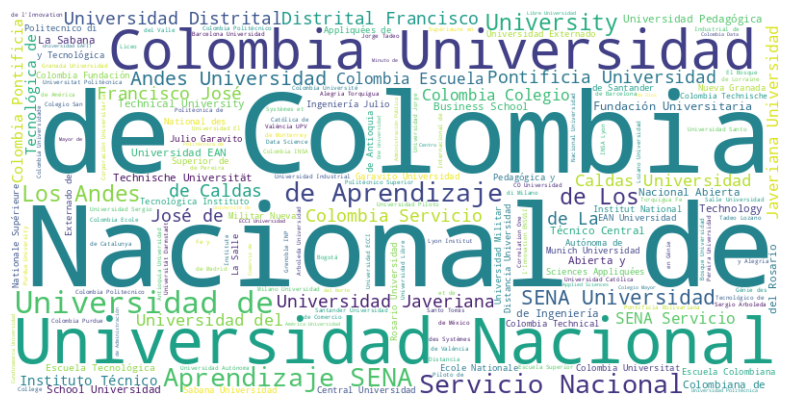

In [556]:
# NPL python
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenar las columnas de interés en una sola cadena de texto
# Concatenar las columnas de interés en una sola cadena de texto
text = ' '.join(df_final_educacion['UNIVERSIDAD'].dropna().astype(str))

# Crear una instancia de la clase WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualizar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [19]:
#df_final_educacion.to_csv('links_egresados.csv')x
#df_final_educacion.to_csv('links_egresados.csv')

#df_final_user.to_csv("EGRESADOS.csv")#.info()

#df_final_empresa_actual.info()
#df_final_otras_empresas.info()

df_final_empresa_actual.fillna('Unknown', inplace=True)
df_final_otras_empresas.fillna('Unknown', inplace=True)

# Step 2: Concatenation
result_df = pd.concat([df_final_empresa_actual, df_final_otras_empresas], ignore_index=True)

# Step 3: Verification
assert len(result_df) == len(df_final_empresa_actual) + len(df_final_otras_empresas), "Row count mismatch after concatenation"


In [7]:
df_final_languages.to_csv("idiomas.xlsx")
df_final_educacion.to_excel("universidad.xlsx")
df_egresados.to_excel("egresados.xlsx")